In [1]:
import numpy as np
import pandas as pd
import xarray as xr

from pathlib import Path

import altair as alt
from altair.expr import datum

In [2]:
%load_ext watermark

In [3]:
%watermark --iversions

numpy     1.16.3
altair    3.0.1
pandas    0.24.2
xarray    0.12.0



In [4]:
from utils.load import load_dilution_data
from utils.calculate_metrics import (process_data, relative_errors, summary_errors)

## Set paths 

In [13]:
data_path = Path('../data')
path_to_results = data_path / "simulation_results"
khodayari_path = path_to_results / "Khodayari"
millard_path = path_to_results / "Millard"
kurata_path = path_to_results / "Kurata"
chassagnole_path = path_to_results / "Chassagnole"

# 1. Load the simulation data

In [5]:
dil_df, debug_info = load_dilution_data()

In [6]:
dil_df.head()

,flux,ID,BiGG_ID,author,sample_id,normalized_flux
0,-0.054344,ACALD,ACALD,Khodayari,0.2,-0.049474
1,-0.004107,ACALDtpp_ex,composed of ACALDtex and ACALDtpp,Khodayari,0.2,-0.003739
2,0.088129,ACKr,ACKr,Khodayari,0.2,0.080232
3,96.831733,ACONTa,ACONTa,Khodayari,0.2,88.154691
4,96.797201,ACONTb,ACONTb,Khodayari,0.2,88.123254


### Preprocess data

In [7]:
xdf = process_data(dil_df, author="Yao")

# 2. Calculate error metrics

In [8]:
x_rel_error = relative_errors(xdf, author="Yao")

In [9]:
x_norm_error = summary_errors(xdf, author="Yao")

# 3. Visualize

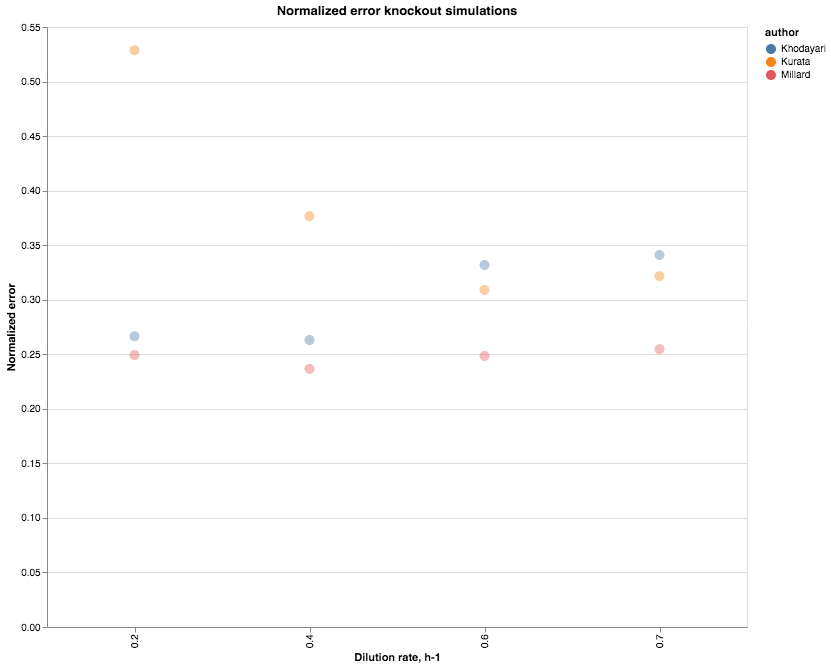

In [11]:
selector = alt.selection_single(empty="all", fields=["sample_id"])
color = alt.condition(
    selector,
    alt.Color(
        "author:N",
        sort=[
            "Khodayari",
            "Kurata",
            "Millard",
            "iML1515",
            "Ec_core",
            "ECC2",
            "Exp_ECC2",
        ],
    ),
    alt.ColorValue("lightgray"),
)

opacity = alt.condition(selector, alt.OpacityValue(0.4), alt.OpacityValue(1.0))

size = alt.condition(selector, alt.SizeValue(100), alt.SizeValue(40))


base = (
    alt.Chart(
        x_norm_error.to_dataframe()
        .reset_index()
        .query("author != 'Yao'"),
        title="Normalized error knockout simulations",
    )
    .mark_circle()
    .encode(
        y=alt.Y("normalized_error", title="Normalized error"),
        tooltip=["author", "sample_id", "normalized_error"],
        x=alt.X("sample_id", sort=["0.2", "0.4", "0.6", "0.7"], title="Dilution rate, h-1"),
        size=size,
        opacity = opacity,
    )
)

errors = (
    base
    .encode(color=color)
    .add_selection(selector)
    .transform_filter("datum.normalized_error !== null")
)

na_vals = base.encode(color=alt.value("lightgrey")).transform_filter("datum.normalized_error === null")


(errors).properties(width=700, height=600).configure_axis(
    labelFontSize=24, titleFontSize=24
).configure_legend(labelFontSize=16, titleFontSize=20).configure(invalidValues=None)


In [12]:
from utils.vis import heatmap, summary_chart

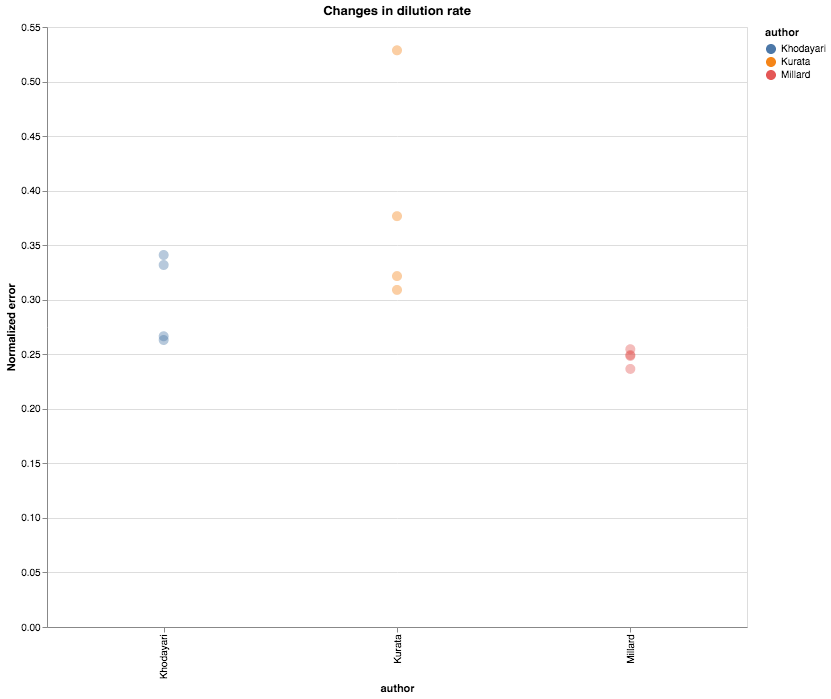

In [13]:
summary_chart(norm_error = x_norm_error, author = "Yao",
              title= "Changes in dilution rate",
              sort_list=[
            "Khodayari",
            "Kurata",
            "Millard"])